# Home Assignment 5. Correlation and linear regression
Probability and Statistics, Autumn 2019    
[CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/), Mai Vu    
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)  

In [1]:
# Import libraries
%pylab inline
import pandas as pd
import seaborn as sns
from numpy import polyfit, polyval
from scipy.stats import linregress

Populating the interactive namespace from numpy and matplotlib


The following problems uses data from [OpenIntro Statistics](https://www.openintro.org/stat/) [Lab for Linear regression](https://www.openintro.org/stat/). The original R-data was read into R-studio and exported as csv-file. 

*NOTE! The data file can be found from the same OMA assignment where you downloaded this Notebook.*

## Problem 1.

- Read in the 'mlb11.csv' file using pandas read_csv function. Tip: Use the first column (Unnamed: 0) as index. See read_csv documentation for more details how to do that.
- Plot the relationship between the `runs` and `at_bats` variables. Use `at_bats` as [predictor](https://en.wikipedia.org/wiki/Regression_analysis) and `runs` as [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables).
- Does the relationship look linear?
- If you knew a team's `at_bats`, would you be comfortable using a linear model to predict the number of runs?

In [2]:
#Read .csv file
X = pd.read_csv('mlb11.csv', index_col = 'Unnamed: 0')
X.sample(10)

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
17,Chicago White Sox,654,5502,1387,154,0.252,989,81,79,0.319,0.388,0.706
20,Toronto Blue Jays,743,5559,1384,186,0.249,1184,131,81,0.317,0.413,0.730
6,New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725
8,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
23,Pittsburgh Pirates,610,5421,1325,107,0.244,1308,108,72,0.309,0.368,0.676
3,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
15,Los Angeles Angels,667,5513,1394,155,0.253,1086,135,86,0.313,0.402,0.714
2,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
14,Cincinnati Reds,735,5612,1438,183,0.256,1250,97,79,0.326,0.408,0.734
13,Chicago Cubs,654,5549,1423,148,0.256,1202,69,71,0.314,0.401,0.715


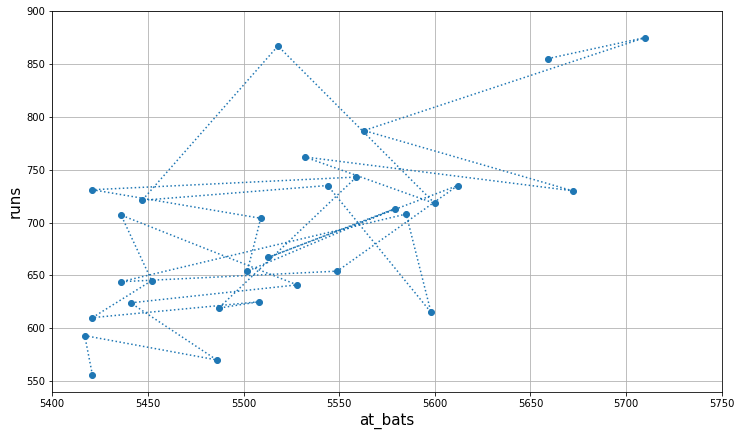

In [3]:
#Plot the relationship between the runs and at_bats variables. Use at_bats as predictor and runs as dependent variable.
plt.figure(figsize = (12, 7))
plt.plot(X['at_bats'], X['runs'], 'o:')
plt.xticks(np.arange(5400, 5751, 50), fontsize = 10)
plt.yticks(np.arange(550, 901, 50), fontsize = 10)
plt.xlabel('at_bats', fontsize = 15)
plt.ylabel('runs', fontsize = 15)
plt.grid()
plt.show()

Well, to me it doesn't look linear at all, but I'm confident that I can come up with a model that has a low root mean square error (RMSE).

## Problem 2.
- Looking at your plot from the previous problem, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.
- Using the `polyfit` function choose a line that fits best to the data in previous problem.
- Make a graph where you have drawn both the datapoints and the best fitted linear line between the two variables.

Correlation matrix: 
             runs   at_bats
runs     1.000000  0.610627
at_bats  0.610627  1.000000

Pairplots: 


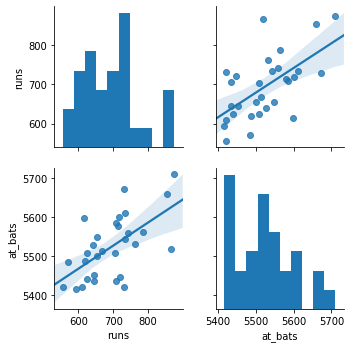

In [4]:
#Print the correaltion matrix and pairplots for 'runs' and 'at_bats' features
corr = X[['runs','at_bats']].corr()
print("Correlation matrix: ")
print(corr)
print("\nPairplots: ")
sns.pairplot(X, vars=['runs', 'at_bats'], kind="reg")
plt.show()

According to the correlation matrix, 'runs' and 'at_bats' have a quite high positive correlation values, meaning one is in direct proportion with another. The pairplots shows the relationship between variables and to itself, also the regression line.

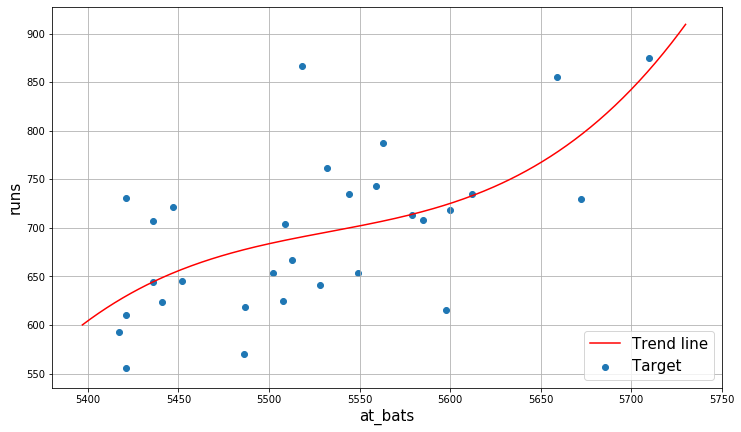

In [5]:
#Using the polyfit function to choose a line that fits best to the data in previous problem
weights = np.polyfit(X['at_bats'] , X['runs'], 3)
model = np.poly1d(weights)
xp = np.linspace(min(X['at_bats']) - 20, max(X['at_bats']) + 20, 300)
prediction_plot = model(xp)
prediction = model(X['at_bats'])
#print(prediction_plot[178]) #Prediction at_bats approximately equals 5578 for the bonus

#Plot both the targets and line of best fit
plt.figure(figsize = (12, 7))
plt.plot(xp, prediction_plot, label = 'Trend line', color = 'r')
plt.scatter(x = X['at_bats'], y = X['runs'], label = 'Target')
plt.xticks(np.arange(5400, 5751, 50), fontsize = 10)
plt.yticks(np.arange(550, 901, 50), fontsize = 10)
plt.xlabel('at_bats', fontsize = 15)
plt.ylabel('runs', fontsize = 15)
plt.grid()
plt.legend(loc = 'lower right', prop={'size': 15})
plt.show()

It seems like the line of best fit doesn't fit to the targets. I checked the MSE and RMSE as the below cell. It's unsurprising that MSE and RMSE are high.

In [6]:
#Checking the mean square error and root mean square error of the previous model
from sklearn.metrics import mean_squared_error
print("MSE = ", mean_squared_error(X['runs'], prediction))
print("RMSE = ", np.sqrt(mean_squared_error(X['runs'], prediction)))

MSE =  3964.1098897684856
RMSE =  62.96117763962556


Maybe it's because I chose the inappropriate degree. I checked the degree from 1 to 6 as below and plotted the RMSE corresponding to number of degrees as below cell.

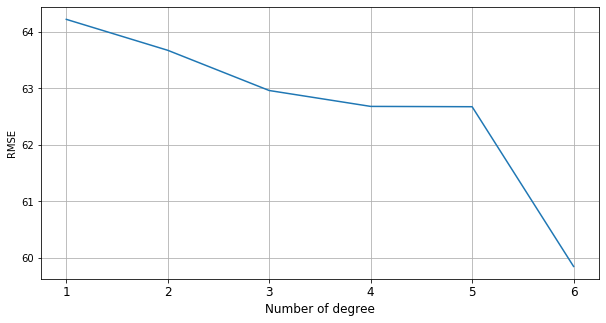

In [7]:
RMSE_poly = []
for i in range(1,7):
    weights = np.polyfit(X['at_bats'] , X['runs'], i)
    model = np.poly1d(weights)
    xp = np.linspace(min(X['at_bats']) - 20, max(X['at_bats']) + 20, 100)
    prediction_plot = model(xp)
    prediction = model(X['at_bats'])

    RMSE_poly.append(np.sqrt(mean_squared_error(X['runs'], prediction)))
    
plt.figure(figsize = (10, 5))
plt.plot(RMSE_poly)
plt.xlabel('Number of degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 10)
plt.xticks(np.arange(0,6,1),np.arange(1, 7), fontsize = 12)
plt.yticks(fontsize = 10)
plt.grid()
plt.show()

Overall, it's still high. So I decided to use all features instead of just using 'at_bats'. Firstly, I checked the correlation matrix and then I used sklearn LinearRegression to find the trend line.

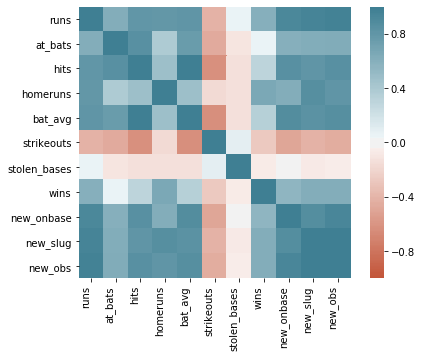

In [8]:
#Print the correlation matrix for all features
corr = X.corr()
plt.figure(figsize = (7,5))
ax = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200),
                 vmin=-1, vmax=1, center=0, square = True)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')
plt.show()

R coef =  [-5.30582166e+03  7.40295777e+03  1.70158426e+03 -5.09054274e+07
 -8.87022498e+02  1.74319091e+03  9.57875460e+02 -3.28589467e+07
 -4.64509386e+07  5.21636581e+07]
RMSE =  15.890285336236976


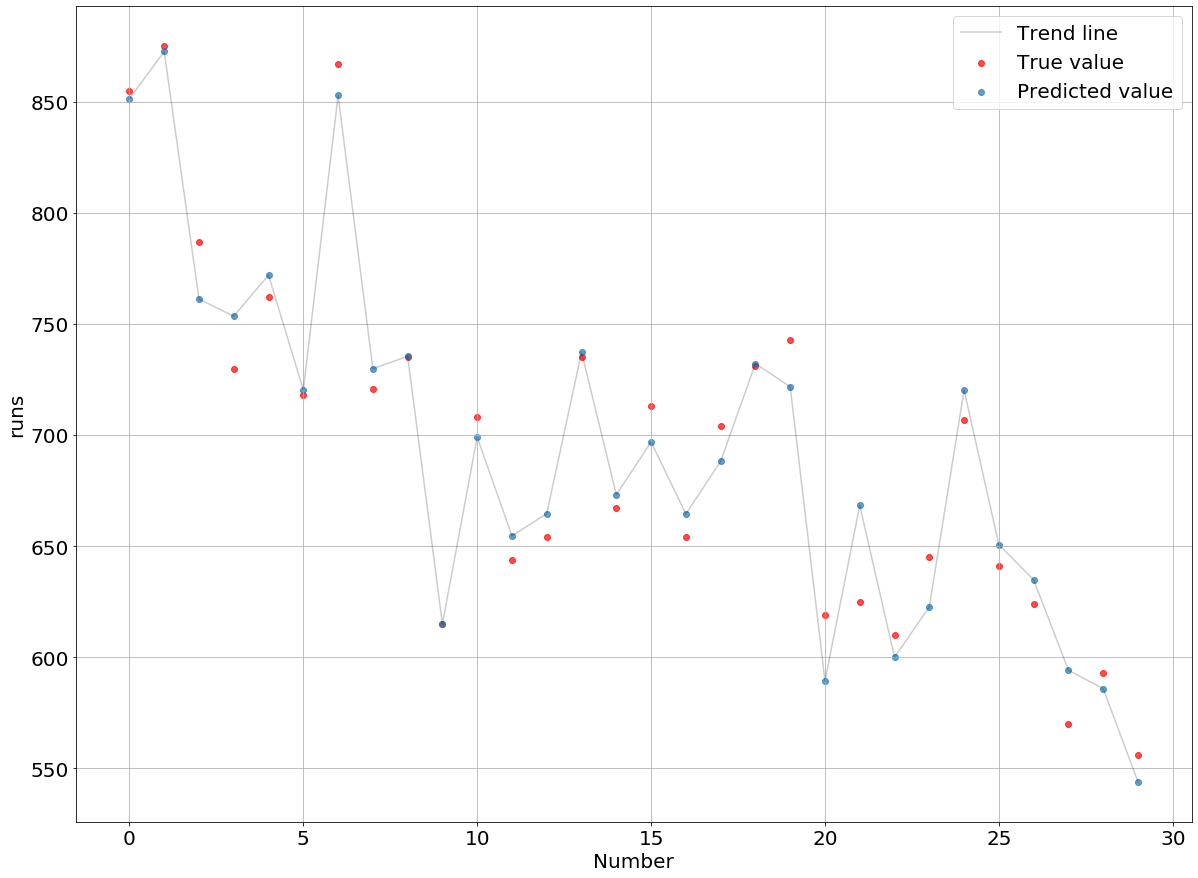

In [9]:
from sklearn import preprocessing
from sklearn import linear_model

temp = X[['at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts', 'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs']].copy()
Norm = preprocessing.normalize(temp)

R = linear_model.LinearRegression()
R.fit(Norm, X['runs'])
print("R coef = ", R.coef_)

predictions = R.predict(Norm)
print("RMSE = ", np.sqrt(mean_squared_error(X['runs'], predictions)))

plt.figure(figsize = (20, 15))
plt.plot(predictions, color = 'k', alpha = 0.2, label = 'Trend line')
plt.scatter(x = range(X['runs'].size), y = X['runs'], label = 'True value', color = 'r', alpha = 0.7)
plt.scatter(x = range(X['runs'].size), y = predictions, label = 'Predicted value', alpha = 0.7)
plt.legend(loc='upper right', prop={'size': 20})
plt.ylabel("runs", fontsize=20)
plt.xlabel("Number", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

The MSE did drop significantly. The trend line is now fit better than the previous line. To me it's still quite high, so I tried one more time with all features and applied poly transformation before doing the linear regression.

Poly's RMSE = 1.17e-09


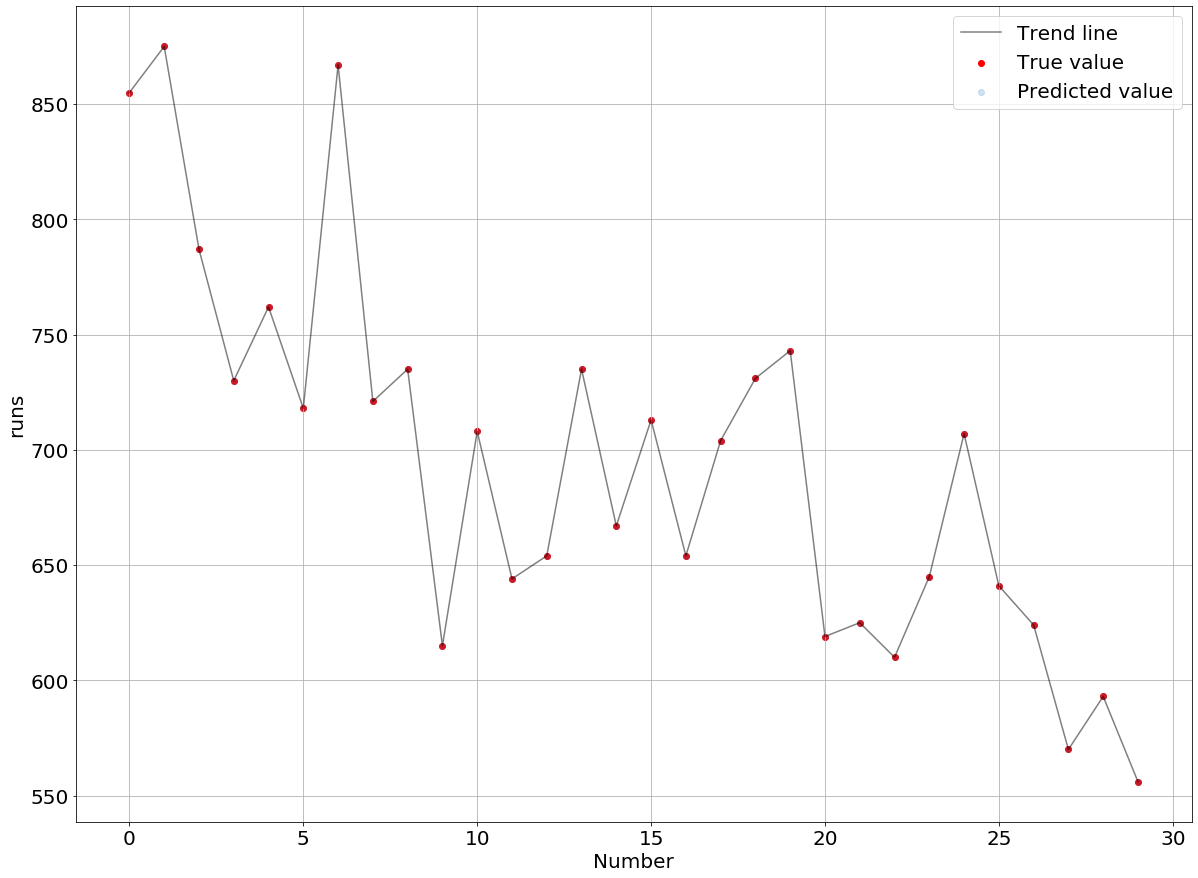

In [10]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
temp = X[['at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts', 'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs']].copy()
temp_poly = polynomial_features.fit_transform(temp)

Norm = preprocessing.normalize(temp_poly)
R = linear_model.LinearRegression()
R.fit(Norm, X['runs'])
poly_pred = R.predict(Norm)
print("Poly's RMSE =",  round(np.sqrt(mean_squared_error(X['runs'], poly_pred)), 11))

plt.figure(figsize = (20, 15))
plt.plot(poly_pred, color = 'k', alpha = 0.5, label = 'Trend line')
plt.scatter(x = range(X['runs'].size), y = X['runs'], label = 'True value', color = 'r', alpha = 1)
plt.scatter(x = range(X['runs'].size), y = poly_pred , label = 'Predicted value', alpha = 0.2)
plt.legend(loc = 'upper right', prop = {'size': 20})
plt.ylabel("runs", fontsize = 20)
plt.xlabel("Number", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

Well the trend line fits perfectly. I had to reduce the opacity of the predicted values so that the targets could be seen. To me, it seems overfitting but well the dataset is so small so I didn't split the dataset into train and test set. Therefore, I cannot checked the loss function on the train and the test to conclude whether it's overfit or not. I believe because the dataset is small so the trend line perfectly fits.<br>In conclusion, with 'at_bats' itself, it's hard to predict correctly the runs, other features should be considered as well.

## Problem 4. (Bonus)

- If a team manager saw the regression line and not the actual data (you could draw the line only), how many runs would he or she predict for a team with 5,578 at-bats?
- Is this an overestimate or an underestimate, and by how much? (In other words, what is the residual for this prediction?)

So for the np.polyfit model, when the team manager sees the regression line (with the degree equals 3), the predited runs is approximately 725 runs. While in the dataset there is at_bats equals to 5579, its runs are 713. So it's an overrestimate by approxiamtely 10 runs.

## Problem 3.

- Fit a new model that uses `homeruns` to predict **`wins`**. 
- **Find the equation of the regression line (= values for slope and interception)**.
- Make a graph that combines both the datapoints and the regression line.
- What does the slope tells us about the relationship between success of a team and its homeruns?

Correlation matrix: 
          homeruns      wins
homeruns  1.000000  0.660614
wins      0.660614  1.000000

Pairplots: 


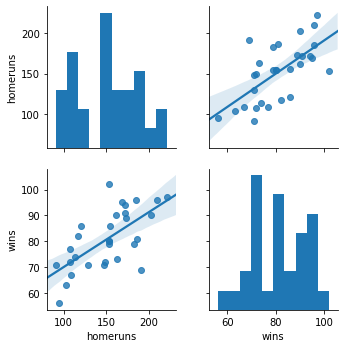

In [11]:
#Print the correaltion matrix and pairplots for 'homeruns' and 'wins' features
corr = X[['homeruns','wins']].corr()
print("Correlation matrix: ")
print(corr)
print("\nPairplots: ")
sns.pairplot(X, vars=['homeruns', 'wins'], kind="reg")
plt.show()

Again, the correlation values for homeruns and wins are positively high and as the pairplots shows, I believe the slope would be positive as well, meaning one is likely in direct proportion with another.

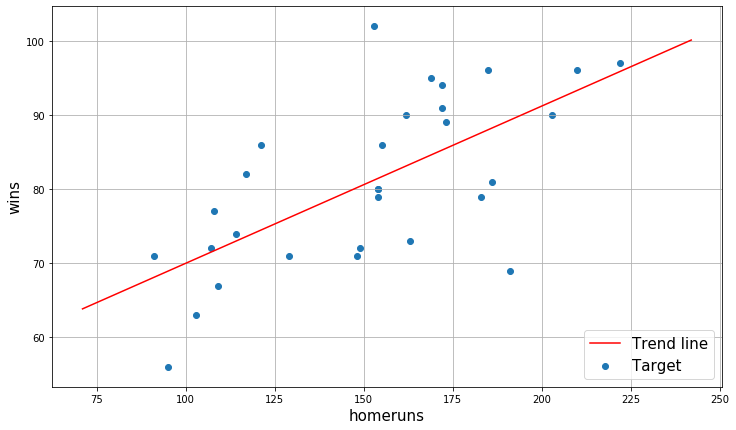

In [12]:
#Fit a new model that uses 'homeruns' to predict 'wins'
weights = np.polyfit(X['homeruns'] , X['wins'], 1)
model = np.poly1d(weights)
xp = np.linspace(min(X['homeruns']) - 20, max(X['homeruns']) + 20, 130)
prediction_plot = model(xp)

#Plot both the targets and line of best fit
plt.figure(figsize = (12, 7))
plt.plot(xp, prediction_plot, label = 'Trend line', color = 'r')
plt.scatter(x = X['homeruns'], y = X['wins'], label = 'Target')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('homeruns', fontsize = 15)
plt.ylabel('wins', fontsize = 15)
plt.grid()
plt.legend(loc = 'lower right', prop={'size': 15})
plt.show()

In [13]:
print(weights)

[ 0.21190268 48.81396687]


The equation of the regression line is y = 0.21190268x + 48.81396687. The slope is 0.21190268 and the y-intercept is 48.81396687. So as expected, the slope is positive and both variables are likely in direct proportion.